In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

df = pd.read_csv('imdb_top_1000.csv')
print(df.head())
print(df.info())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

#### Nettoyer la variable 'Gross'.

In [83]:
df['Gross'] = df['Gross'].str.replace(',', '')  # Enlever les virgules
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')  # Convertir en numérique

print(df)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

#### pour chacune des variables 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_votes' et 'Gross' mener l'étude suivante et interpréter les résultats :

    Représentations graphiques (histogramme, boîte à moustache, diagramme en violon, etc.).
    Calcul des paramètres de position.
    Calcul des paramètre de dispersion.
    Calcul des paramètre de forme.
    Recherche des valeurs extrêmes.


##  'Runtime'

In [60]:
#netoyage de la variable Runtime
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


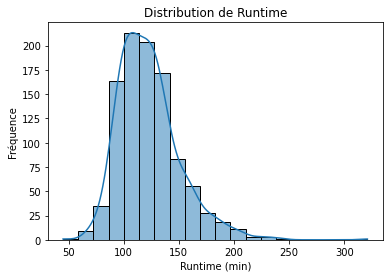

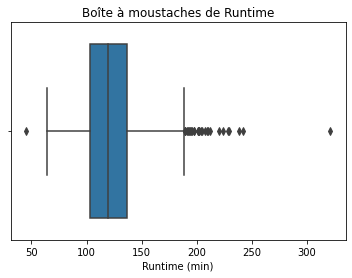

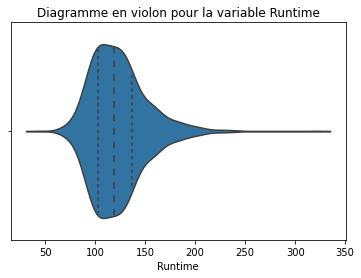

In [61]:
# Histogramme
plt.figure(figsize=(6, 4))
sns.histplot(df['Runtime'], bins=20, kde=True)
plt.title('Distribution de Runtime')
plt.xlabel('Runtime (min)')
plt.ylabel('Fréquence')
plt.show()

# Boîte à moustaches
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Runtime'])
plt.title('Boîte à moustaches de Runtime')
plt.xlabel('Runtime (min)')
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Runtime'], inner='quartile')
plt.title(f'Diagramme en violon pour la variable Runtime')
plt.xlabel('Runtime')
plt.show()

In [62]:
# Calcul des paramètres de position
mediane_runtime = df['Runtime'].median()
moyenne_runtime = df['Runtime'].mean()

# Calcul des paramètres de dispersion
std_runtime = df['Runtime'].std()
etendue = df['Runtime'].max() - df['Runtime'].min()

# Affichage des résultats
print("Paramètres de position")
print("Médiane de Runtime :", mediane_runtime)
print("Moyenne de Runtime :", moyenne_runtime)
print("\nParamètres de dispersion")
print("Écart-type de Runtime :", std_runtime)
print("Étendue de Runtime :", etendue)

Paramètres de position
Médiane de Runtime : 119.0
Moyenne de Runtime : 122.891

Paramètres de dispersion
Écart-type de Runtime : 28.093671411429547
Étendue de Runtime : 276


In [63]:
# Calculs de forme
skew = skew(df['Runtime'])
kurt = kurtosis(df['Runtime'])

print("Paramètres de forme")
print("Coefficient d’asymétrie ", skew)
print("Coefficient d’aplatissement", kurt)

Paramètres de forme
Coefficient d’asymétrie  1.206096272929503
Coefficient d’aplatissement 3.403163488522911


In [64]:
# Calcul de l'écart interquartile (IQR)
Q1 = df['Runtime'].quantile(0.25)
Q3 = df['Runtime'].quantile(0.75)
IQR = Q3 - Q1
print("l'écart interquartile (IQR)")
print(IQR)
# Détermination des valeurs extrêmes
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
val_extremes = df[(df['Runtime'] < borne_inf ) | (df['Runtime'] > borne_sup)]['Runtime']

# Affichage des valeurs extrêmes
print("Valeurs extrêmes de Runtime :")
print(val_extremes)

l'écart interquartile (IQR)
34.0
Valeurs extrêmes de Runtime :
3      202
5      201
7      195
25     189
31     207
71     229
116    228
140    321
156    210
177    204
194     45
206    196
247    224
258    189
290    205
300    212
314    238
400    189
411    191
430    197
484    209
549    197
552    220
629    192
652    194
686    193
812    242
820    202
996    201
Name: Runtime, dtype: int64


## 'Gross'

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


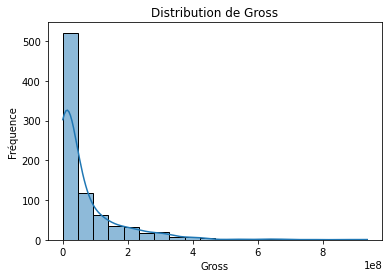

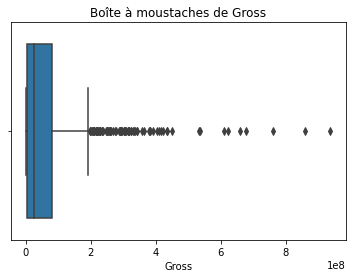

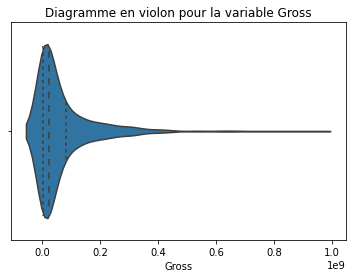

In [65]:
# Histogramme
plt.figure(figsize=(6, 4))
sns.histplot(df['Gross'], bins=20, kde=True)
plt.title('Distribution de Gross')
plt.ylabel('Fréquence')
plt.show()

# Boîte à moustaches
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Gross'])
plt.title('Boîte à moustaches de Gross')
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Gross'], inner='quartile')
plt.title(f'Diagramme en violon pour la variable Gross')
plt.xlabel('Gross')
plt.show()

## 'IMDB_Rating'

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


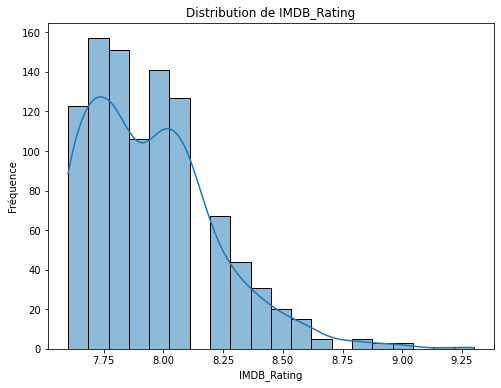

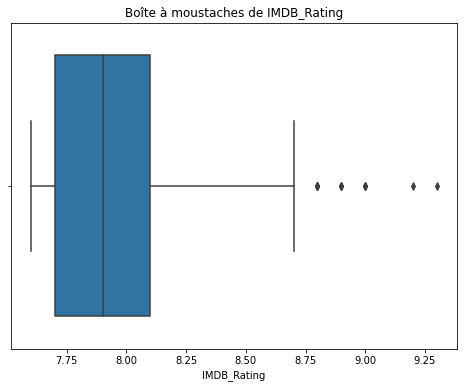

In [67]:
# Histogramme
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution de IMDB_Rating')
plt.xlabel('IMDB_Rating')
plt.ylabel('Fréquence')
plt.show()

# Boîte à moustaches
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['IMDB_Rating'])
plt.title('Boîte à moustaches de IMDB_Rating')
plt.xlabel('IMDB_Rating')
plt.show()

In [68]:
# Calcul des paramètres de position
median_rating = df['IMDB_Rating'].median()

# Calcul des paramètres de dispersion
std_rating = df['IMDB_Rating'].std()

# Affichage des résultats
print("Paramètres de position")
print("Médiane de IMDB_Rating :", median_rating)
print("\nParamètres de dispersion")
print("Écart-type de IMDB_Rating :", std_rating)

Paramètres de position
Médiane de IMDB_Rating : 7.9

Paramètres de dispersion
Écart-type de IMDB_Rating : 0.27549120749200917


In [69]:
# Calcul de l'écart interquartile (IQR)
Q1 = df['IMDB_Rating'].quantile(0.25)
Q3 = df['IMDB_Rating'].quantile(0.75)
IQR = Q3 - Q1
print("l'écart interquartile (IQR)")
print(IQR)
# Détermination des valeurs extrêmes
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
val_extremes = df[(df['IMDB_Rating'] < borne_inf) | (df['IMDB_Rating'] > borne_sup)]['IMDB_Rating']

# Affichage des valeurs extrêmes
print("Valeurs extrêmes de IMDB_Rating")
print(val_extremes)

l'écart interquartile (IQR)
0.39999999999999947
Valeurs extrêmes de IMDB_Rating
0     9.3
1     9.2
2     9.0
3     9.0
4     9.0
5     8.9
6     8.9
7     8.9
8     8.8
9     8.8
10    8.8
11    8.8
12    8.8
Name: IMDB_Rating, dtype: float64


## 'Meta_score'

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


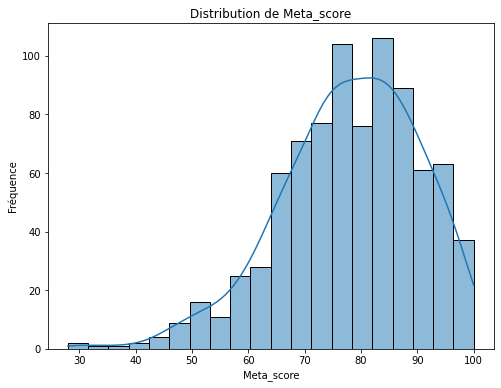

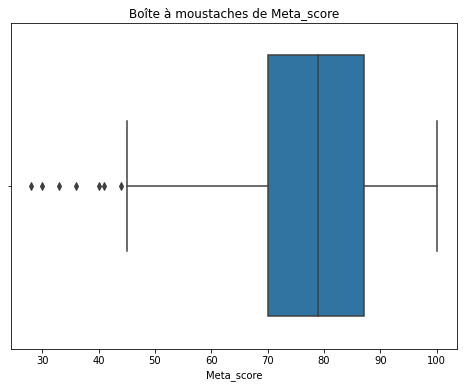

In [70]:
# Histogramme
plt.figure(figsize=(8, 6))
sns.histplot(df['Meta_score'], bins=20, kde=True)
plt.title('Distribution de Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Fréquence')
plt.show()

# Boîte à moustaches
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Meta_score'])
plt.title('Boîte à moustaches de Meta_score')
plt.xlabel('Meta_score')
plt.show()

In [71]:
# Calcul des paramètres de position
median_meta_score = df['Meta_score'].median()

# Calcul des paramètres de dispersion
std_meta_score = df['Meta_score'].std()

# Affichage des résultats
print("Paramètres de position :")
print("Médiane de Meta_score :", median_meta_score)
print("\nParamètres de dispersion :")
print("Écart-type de Meta_score :", std_meta_score)

Paramètres de position :
Médiane de Meta_score : 79.0

Paramètres de dispersion :
Écart-type de Meta_score : 12.376099328602022


In [72]:
# Calcul de l'écart interquartile (IQR)
Q1 = df['Meta_score'].quantile(0.25)
Q3 = df['Meta_score'].quantile(0.75)
IQR = Q3 - Q1

# Détermination des valeurs extrêmes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
extreme_values = df[(df['Meta_score'] < lower_bound) | (df['Meta_score'] > upper_bound)]['Meta_score']

# Affichage des valeurs extrêmes
print("Valeurs extrêmes de Meta_score :")
print(extreme_values)

Valeurs extrêmes de Meta_score :
356    33.0
648    44.0
735    40.0
788    28.0
917    36.0
942    30.0
957    41.0
Name: Meta_score, dtype: float64


## 'No_of_Votes'

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


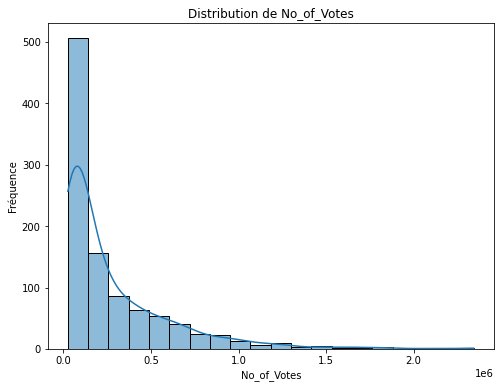

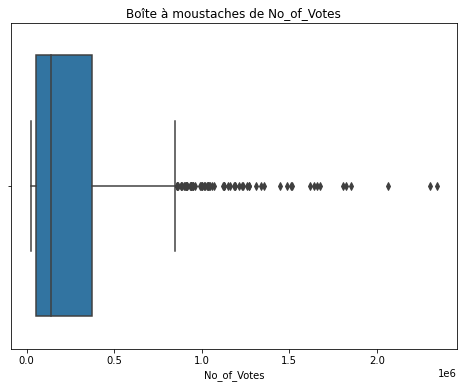

In [73]:
# Histogramme
plt.figure(figsize=(8, 6))
sns.histplot(df['No_of_Votes'], bins=20, kde=True)
plt.title('Distribution de No_of_Votes')
plt.xlabel('No_of_Votes')
plt.ylabel('Fréquence')
plt.show()

# Boîte à moustaches
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['No_of_Votes'])
plt.title('Boîte à moustaches de No_of_Votes')
plt.xlabel('No_of_Votes')
plt.show()


In [74]:
# Calcul des paramètres de position
median_no_of_votes = df['No_of_Votes'].median()

# Calcul des paramètres de dispersion
std_no_of_votes = df['No_of_Votes'].std()

# Affichage des résultats
print("Paramètres de position :")
print("Médiane de No_of_Votes :", median_no_of_votes)
print("\nParamètres de dispersion :")
print("Écart-type de No_of_Votes :", std_no_of_votes)

Paramètres de position :
Médiane de No_of_Votes : 138548.5

Paramètres de dispersion :
Écart-type de No_of_Votes : 327372.7039341249


In [75]:
# Calcul de l'écart interquartile (IQR)
Q1 = df['No_of_Votes'].quantile(0.25)
Q3 = df['No_of_Votes'].quantile(0.75)
IQR = Q3 - Q1

# Détermination des valeurs extrêmes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
extreme_values = df[(df['No_of_Votes'] < lower_bound) | (df['No_of_Votes'] > upper_bound)]['No_of_Votes']

# Affichage des valeurs extrêmes
print("Valeurs extrêmes de No_of_Votes :")
print(extreme_values)

Valeurs extrêmes de No_of_Votes :
0      2343110
1      1620367
2      2303232
3      1129952
5      1642758
        ...   
376    1015122
477     860823
502     939644
623    1118998
652    1046089
Name: No_of_Votes, Length: 67, dtype: int64


In [87]:
# Calcul de l'asymétrie (skewness)
skewness_no_of_votes = skew(df['No_of_Votes'])

# Calcul de l'aplatissement (kurtosis)
kurtosis_no_of_votes = kurtosis(df['No_of_Votes'])

# Affichage des résultats
print("Paramètres de forme :")
print("Asymétrie de No_of_Votes :", skewness_no_of_votes)
print("Aplatissement de No_of_Votes :", kurtosis_no_of_votes)

Paramètres de forme :
Asymétrie de No_of_Votes : 2.2965591310736615
Aplatissement de No_of_Votes : 6.854678056032689


#### Créer deux nouvelles variables 'Log_No_of_votes' et 'Log_Gross' égales respectivement au logarithme des variables 'No_of_votes' et 'Gross' (on pourra utiliser la fonction 'log' de numpy).

In [88]:
import numpy as np

df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['Log_No_of_votes'] = np.log(df['No_of_Votes'])
df['Log_Gross'] = np.log(df['Gross'])
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

#### Etudier la répartition et la forme de ces deux nouvelles variables (histogramme, boîte à moustache, kurtosis, etc.)

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


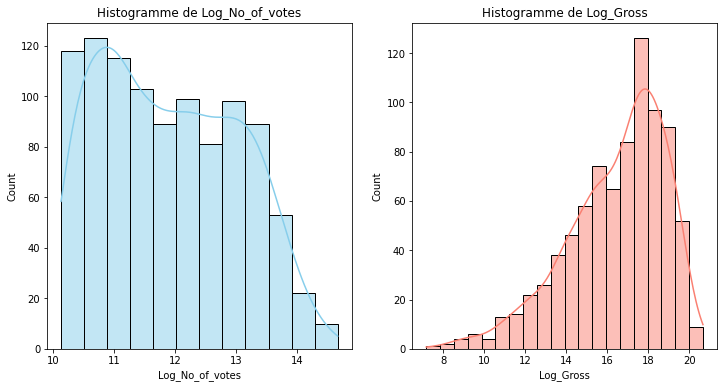

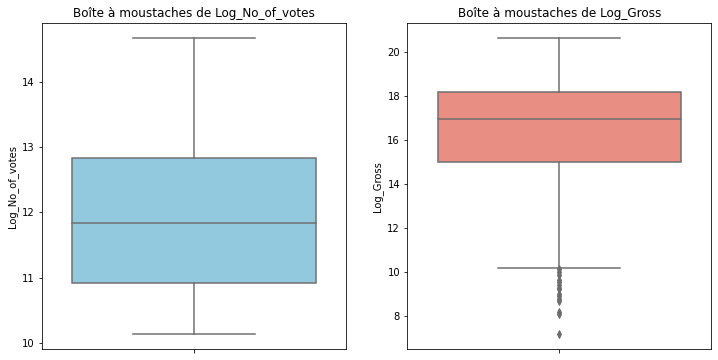

Kurtosis de Log_No_of_votes : -1.05112846291406
Kurtosis de Log_Gross : nan
Asymétrie de Log_No_of_votes : 0.2325251026707385
Asymétrie de Log_Gross : nan


In [86]:
# Histogrammes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Log_No_of_votes'], kde=True, color='skyblue')
plt.title('Histogramme de Log_No_of_votes')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Gross'], kde=True, color='salmon')
plt.title('Histogramme de Log_Gross')
plt.show()

# Boîtes à moustaches
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Log_No_of_votes'], color='skyblue')
plt.title('Boîte à moustaches de Log_No_of_votes')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Log_Gross'], color='salmon')
plt.title('Boîte à moustaches de Log_Gross')
plt.show()

# Calcul de la kurtosis
kurtosis_log_no_of_votes = kurtosis(df['Log_No_of_votes'])
kurtosis_log_gross = kurtosis(df['Log_Gross'])
print("Kurtosis de Log_No_of_votes :", kurtosis_log_no_of_votes)
print("Kurtosis de Log_Gross :", kurtosis_log_gross)

# Calcul de l'asymétrie
skewness_log_no_of_votes = skew(df['Log_No_of_votes'])
skewness_log_gross = skew(df['Log_Gross'])
print("Asymétrie de Log_No_of_votes :", skewness_log_no_of_votes)
print("Asymétrie de Log_Gross :", skewness_log_gross)